<a href="https://colab.research.google.com/github/jhonidesouza/Analise-de-Dados-com-Python/blob/main/Desafio04%20-%20Regress%C3%A3o%20com%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando a biblioteca pandas para poder carregar a base de dados
import pandas as pd


In [2]:
# Carregando a base de dados MKT.csv que esta utilizando o separador vírgula
base_mkt = pd.read_csv("MKT.csv", sep=",")

In [3]:
# Verificando algumas informações da base de dados
base_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
# Verificando a descrição da base: contagem, média, mediana, valor mínimo, etc.
base_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [5]:
# Mostrando as 5 primeiras linhas da base de dados
base_mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [6]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [8]:
fig = px.box(base_mkt, x="sales")
fig.update_traces(line_color="green")

In [9]:
fig = px.box(base_mkt, x="youtube")
fig.update_traces(line_color="red")

In [10]:
fig = px.box(base_mkt, x="facebook")
fig.update_traces(line_color="blue")

In [11]:
fig = px.box(base_mkt, x="newspaper")
fig.update_traces(line_color="gray")

In [12]:
base_mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [13]:
import seaborn as sns

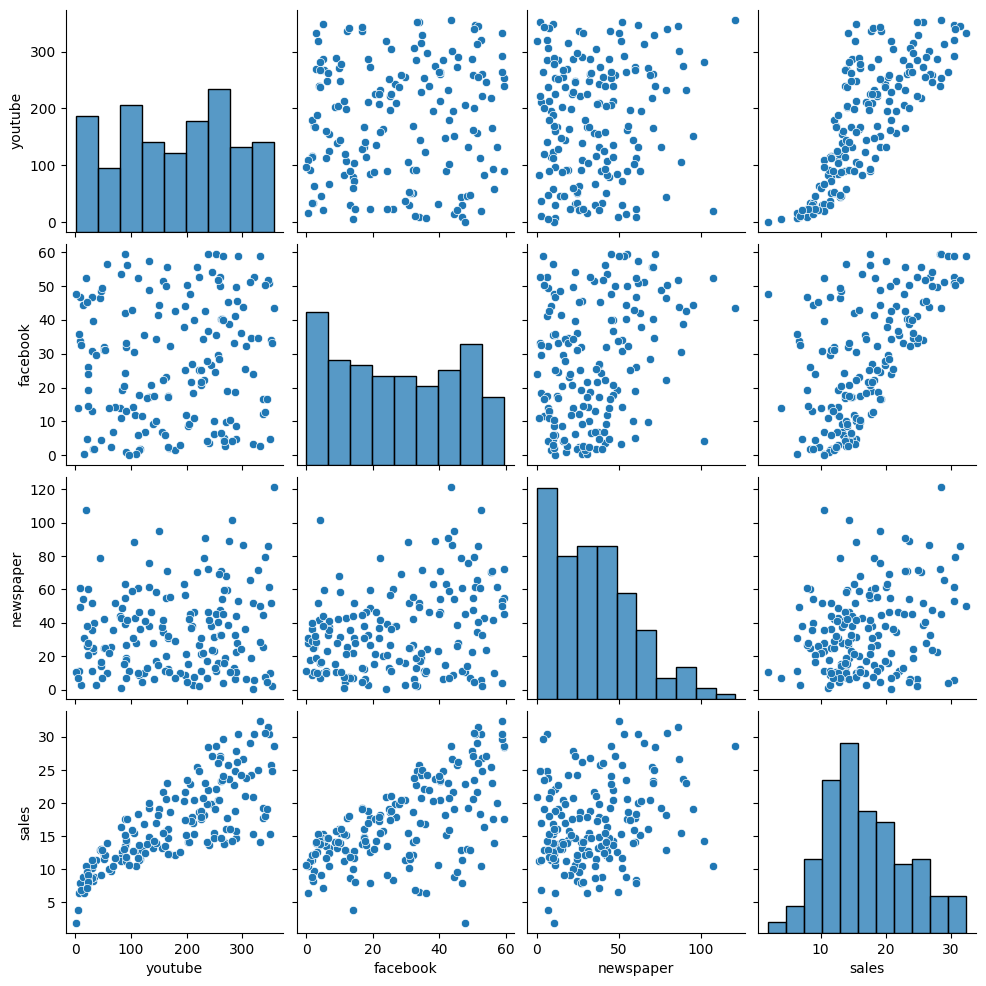

In [14]:
# Verificando padrões e relações relevantes entre as váriaveis
sns.pairplot(base_mkt)

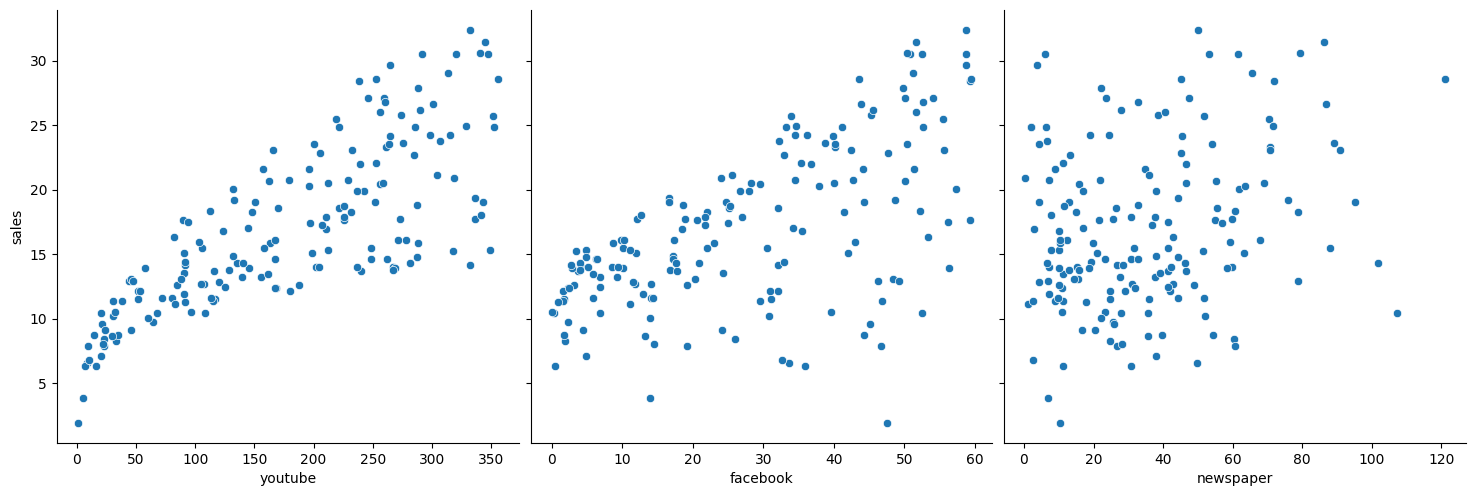

In [15]:
# Verificando relações e padrões entre as váriaveis de investimento nas plataformas com as vendas
sns.pairplot(base_mkt, x_vars=["youtube", "facebook", "newspaper"], y_vars="sales", height=5)

In [16]:
base_mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

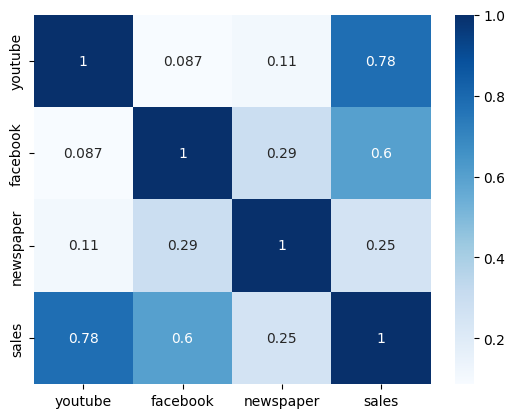

In [17]:
sns.heatmap(base_mkt.corr(), cmap="Blues", annot=True)

<Axes: xlabel='sales', ylabel='Count'>

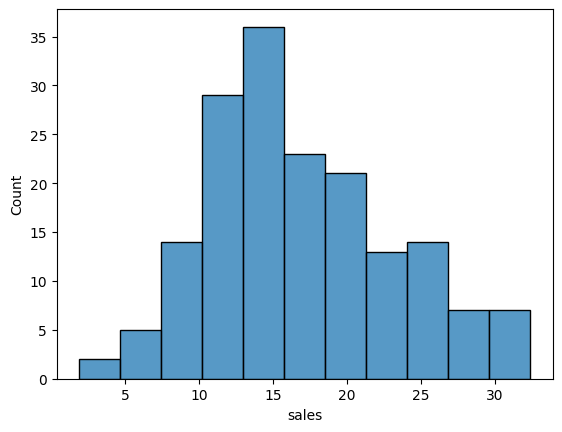

In [18]:
sns.histplot(base_mkt['sales'])

In [19]:
base_mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [20]:
X = base_mkt[['youtube', 'facebook', 'newspaper']]
Y = base_mkt[['sales']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Treinando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [26]:
Y_pred = lm.predict(X_test)

In [27]:
# Verificando qual a porcentagem de acerto do modelo em relação as variáveis
from sklearn.metrics import r2_score
r = r2_score(Y_test, Y_pred)
print(r)

0.882423505618885


In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Vendas')

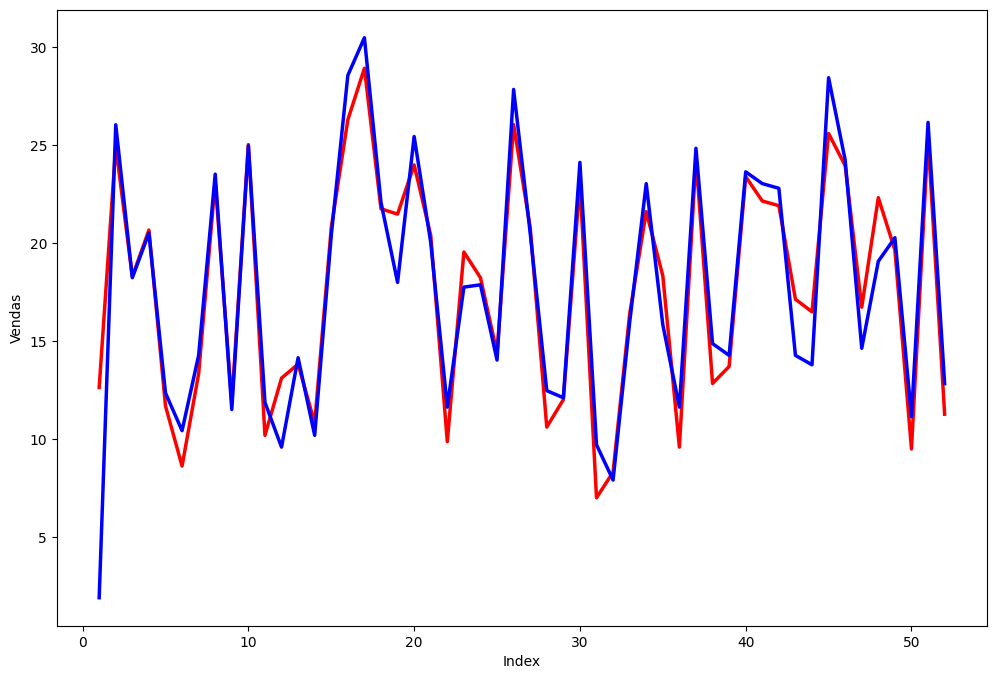

In [29]:
# Comparando o modelo de predição com a base
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, Y_pred, color="red", linewidth=2.5, linestyle="-")
plt.plot(c, Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.xlabel("Index")
plt.ylabel("Vendas")

In [30]:
base_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [31]:
# Exemplo de predição com base na média de investimentos em cada plataforma
Avg_Youtube = 178
Avg_Facebook = 27
AVG_Newspaper = 35
entrada = [[Avg_Youtube, Avg_Facebook, AVG_Newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([16.78785639])

In [32]:
# Conforme o exemplo acima utilizando a média de investimento em cada plataforma, a predição chegou ao valor praticamente igual ao da base de 16 em vendas.